## **Importing Necessary Libraries**

In [55]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **Importing Data**

In [42]:
birth_data = pd.read_csv('births.csv')
birth_data

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


## **Data Understanding**

In [43]:
birth_data.shape

(15547, 5)

In [44]:
birth_data.dtypes

year        int64
month       int64
day       float64
gender     object
births      int64
dtype: object

In [45]:
birth_data.isna().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [46]:
birth_data.fillna(value = 0, inplace = True)
birth_data['day'] = birth_data['day'].astype(int)

In [47]:
birth_data.isna().sum()

year      0
month     0
day       0
gender    0
births    0
dtype: int64

In [48]:
birth_data['decade'] = 10 * (birth_data['year'] // 10)

In [51]:
pivot_table = birth_data.pivot_table('births',index = 'decade',columns='gender',aggfunc='sum')
pivot_table

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


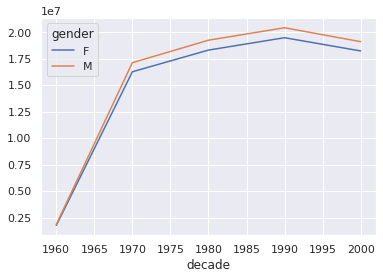

In [52]:
sns.set()
pivot_table.plot()
plt.show()

In [53]:
import numpy as np

quartiles = np.percentile(birth_data['births'], [25, 50, 75])
mean = quartiles[1]
sigma = 0.74 * (quartiles[2] - quartiles[0])

In [56]:
birth_data = birth_data.query('(births > @mean - 5 * @sigma) & (births < @mean + 5 * @sigma)')
birth_data.index = pd.to_datetime(10000 * birth_data.year + 100 * birth_data.month + birth_data.day,
                              format='%Y%m%d')
birth_data['day of week'] = birth_data.index.dayofweek

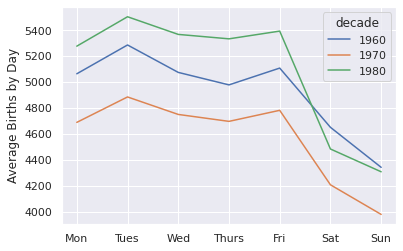

In [57]:
births_day = birth_data.pivot_table('births', index='day of week',
                                columns='decade', aggfunc='mean')
births_day.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
births_day.plot()
plt.ylabel("Average Births by Day")
plt.show()

In [59]:
births_month = birth_data.pivot_table('births', [birth_data.index.month, birth_data.index.day])
print(births_month.head())

births_month.index = [pd.datetime(2012, month, day)
                      for (month, day) in births_month.index]
print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625


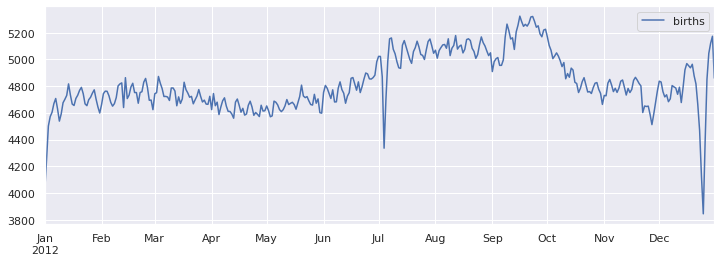

In [60]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()